### Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

### Loading the Data

In [ ]:
df=pd.read_csv(r'Churn_Modelling (1).csv')

In [ ]:
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### * Handle Missing Values:*

In [ ]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Descriptive Statistics On the Dataset.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df["Balance"].mean()

76485.889288

In [ ]:
df['Age'].median()

37.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##  Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


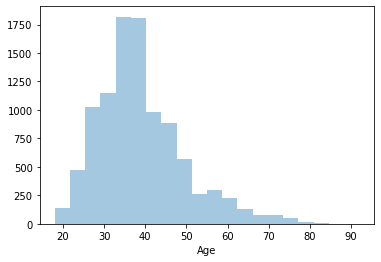

In [ ]:
sns.distplot(df.Age.dropna(), kde=False, bins = 20);

Text(0.5, 0, 'Products')

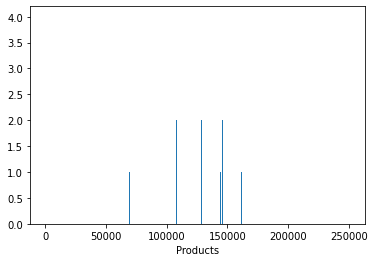

In [ ]:
plt.bar(df['Balance'], df['NumOfProducts'])
plt.xlabel('Products')

### Bi-variate Analysis(Correlation)

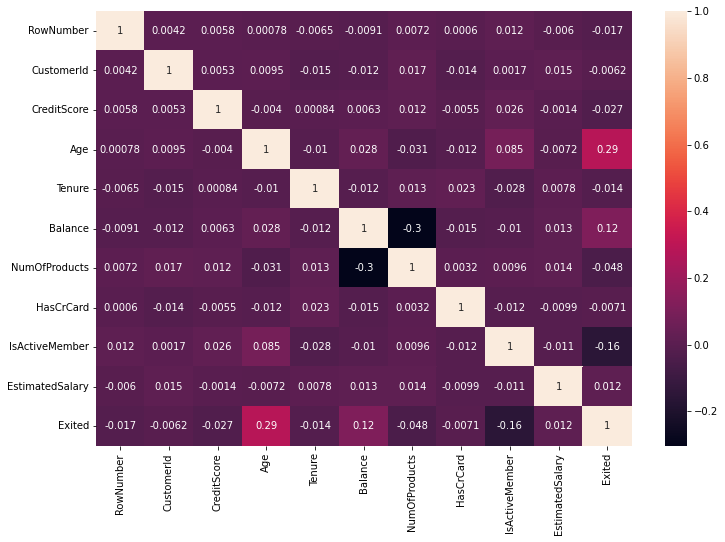

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

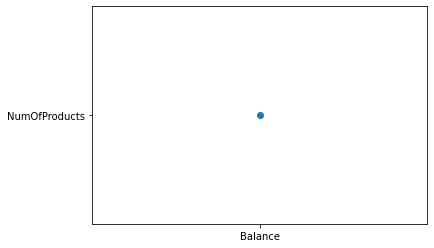

In [ ]:
plt.scatter('Balance','NumOfProducts')

### Multi Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


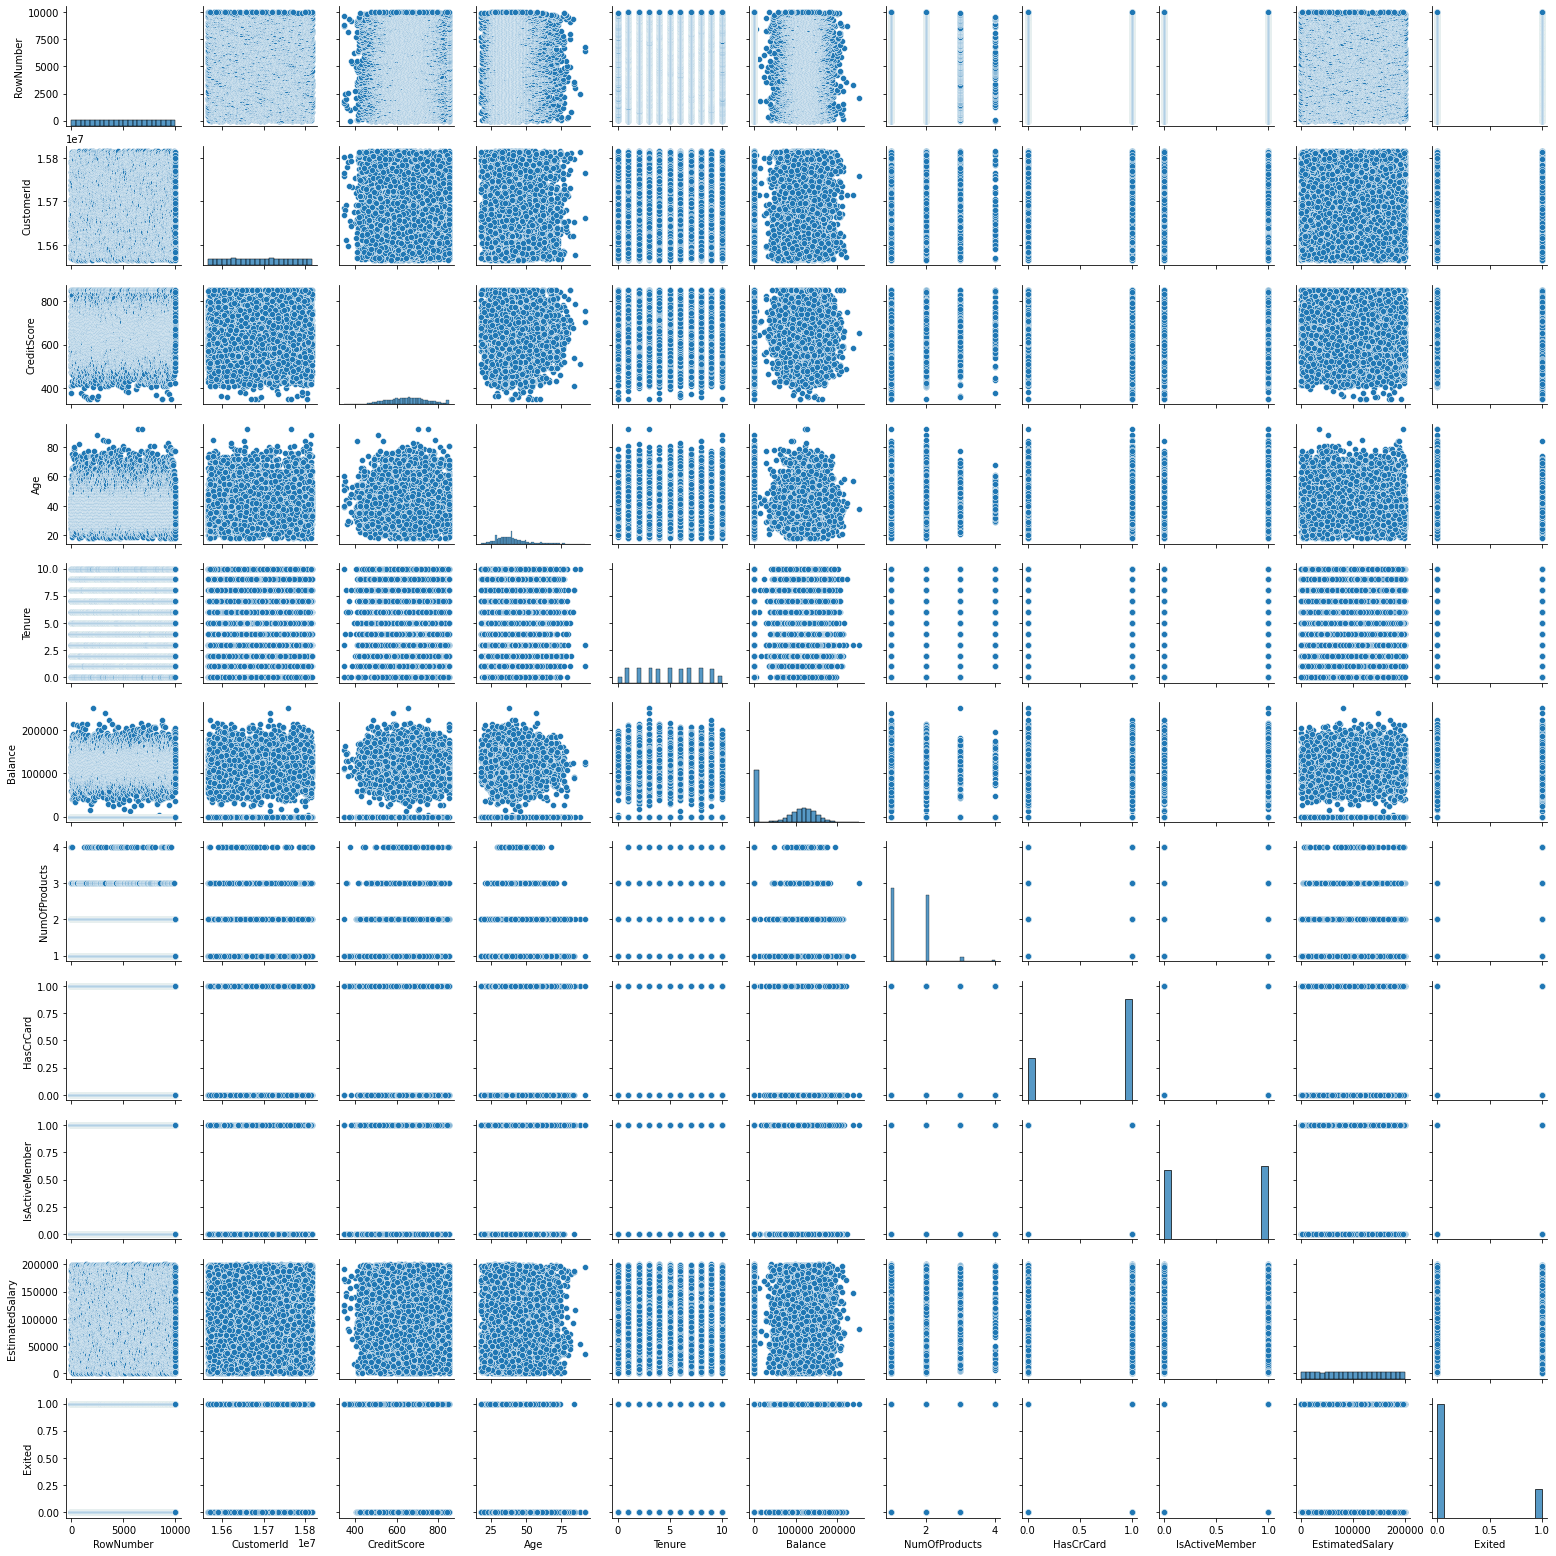

In [ ]:
sns.pairplot(df,size=2)


### Find the outliers and Remove

In [ ]:
df = df.drop (columns=['CustomerId'])
#customerId is deleted .it is a outlier

In [ ]:
df = df.drop (columns=['Gender'])

In [ ]:
df = df.drop (columns=['Geography'])

In [ ]:
df = df.drop (columns=['Surname'])

In [ ]:
df.info()
#there is no customerId column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


## Check for Categorical columns and perform encoding.

In [ ]:
df.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.iloc[:,:]

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,42,2,0.00,1,1,1,101348.88,1
1,2,608,41,1,83807.86,1,0,1,112542.58,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1
3,4,699,39,1,0.00,2,0,0,93826.63,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.iloc[:,0:5]

,RowNumber,CreditScore,Age,Tenure,Balance
0,1,619,42,2,0.00
1,2,608,41,1,83807.86
2,3,502,42,8,159660.80
3,4,699,39,1,0.00
4,5,850,43,2,125510.82
...,...,...,...,...,...
9995,9996,771,39,5,0.00
9996,9997,516,35,10,57369.61
9997,9998,709,36,7,0.00
9998,9999,772,42,3,75075.31


### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count
le=LabelEncoder()
print('before label encoding',count(df['Age']))
df["Age"]=le.fit_transform(df['Age'])
print('after label encoding',count(df['Age']))

before label encoding Counter({37: 478, 38: 477, 35: 474, 36: 456, 34: 447, 33: 442, 40: 432, 39: 423, 32: 418, 31: 404, 41: 366, 29: 348, 30: 327, 42: 321, 43: 297, 28: 273, 44: 257, 45: 229, 46: 226, 27: 209, 26: 200, 47: 175, 48: 168, 25: 154, 49: 147, 50: 134, 24: 132, 51: 119, 52: 102, 23: 99, 22: 84, 54: 84, 55: 82, 57: 75, 53: 74, 56: 70, 58: 67, 59: 62, 60: 62, 61: 53, 21: 53, 62: 52, 20: 40, 63: 40, 67: 37, 64: 37, 66: 35, 19: 27, 71: 27, 18: 22, 69: 22, 72: 21, 68: 19, 65: 18, 70: 18, 74: 18, 73: 13, 76: 11, 77: 10, 75: 9, 78: 5, 79: 4, 81: 4, 80: 3, 84: 2, 92: 2, 82: 1, 88: 1, 85: 1, 83: 1})
after label encoding Counter({19: 478, 20: 477, 17: 474, 18: 456, 16: 447, 15: 442, 22: 432, 21: 423, 14: 418, 13: 404, 23: 366, 11: 348, 12: 327, 24: 321, 25: 297, 10: 273, 26: 257, 27: 229, 28: 226, 9: 209, 8: 200, 29: 175, 30: 168, 7: 154, 31: 147, 32: 134, 6: 132, 33: 119, 34: 102, 5: 99, 4: 84, 36: 84, 37: 82, 39: 75, 35: 74, 38: 70, 40: 67, 41: 62, 42: 62, 43: 53, 3: 53, 44: 52, 2:

In [ ]:
print('before replace',count(df['Exited']))
df['Exited']=df['Exited'].replace([0,1],[1,0])
print('before replace',count(df['Exited']))

before replace Counter({0: 7963, 1: 2037})
before replace Counter({1: 7963, 0: 2037})


In [ ]:
df.shape

(10000, 10)

### Feature Scaling

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()
#df=sc.fit_transform(df)

In [ ]:
#df

array([[-1.73187761, -0.32622142,  0.29379269, ...,  0.97024255,
         0.02188649, -1.97716468],
       [-1.7315312 , -0.44003595,  0.19838686, ...,  0.97024255,
         0.21653375,  0.50577476],
       [-1.73118479, -1.53679418,  0.29379269, ..., -1.03067011,
         0.2406869 , -1.97716468],
       ...,
       [ 1.73118479,  0.60498839, -0.27864224, ...,  0.97024255,
        -1.00864308, -1.97716468],
       [ 1.7315312 ,  1.25683526,  0.29379269, ..., -1.03067011,
        -0.12523071, -1.97716468],
       [ 1.73187761,  1.46377078, -1.04188881, ..., -1.03067011,
        -1.07636976,  0.50577476]])

### Split the data into training and testing

In [ ]:
X=df.drop('Exited',axis=1)


In [ ]:
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
print('X-train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X-train size: (8000, 9), X_test size: (2000, 9)


In [ ]:
print('y-train size: {}, y_test size: {}'.format(y_train.shape, y_test.shape))

y-train size: (8000,), y_test size: (2000,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7389 to 2732
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CreditScore      8000 non-null   int64  
 2   Age              8000 non-null   int64  
 3   Tenure           8000 non-null   int64  
 4   Balance          8000 non-null   float64
 5   NumOfProducts    8000 non-null   int64  
 6   HasCrCard        8000 non-null   int64  
 7   IsActiveMember   8000 non-null   int64  
 8   EstimatedSalary  8000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 625.0 KB


In [ ]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,20.920600,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.796300
std,2886.89568,96.653299,10.482065,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,14.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,1.000000
50%,5000.50000,652.000000,19.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000
75%,7500.25000,718.000000,26.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000
max,10000.00000,850.000000,69.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
df


,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,24,2,0.00,1,1,1,101348.88,0
1,2,608,23,1,83807.86,1,0,1,112542.58,1
2,3,502,24,8,159660.80,3,1,0,113931.57,0
3,4,699,21,1,0.00,2,0,0,93826.63,1
4,5,850,25,2,125510.82,1,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,21,5,0.00,2,1,0,96270.64,1
9996,9997,516,17,10,57369.61,1,1,1,101699.77,1
9997,9998,709,18,7,0.00,1,0,1,42085.58,0
9998,9999,772,24,3,75075.31,2,1,0,92888.52,0


### Split the data into dependent and independent

In [ ]:
x= pd.DataFrame(df.iloc[:,0:10], columns=['CreditScore','Age','Balance','IsActiveMember','	RowNumber','Tenure','NumOfProducts','HasCrCard','EstimatedSalary','Exited'])

In [ ]:
x


,CreditScore,Age,Balance,IsActiveMember,\tRowNumber,Tenure,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,24,0.00,1,NaN,2,1,1,101348.88,0
1,608,23,83807.86,1,NaN,1,1,0,112542.58,1
2,502,24,159660.80,0,NaN,8,3,1,113931.57,0
3,699,21,0.00,0,NaN,1,2,0,93826.63,1
4,850,25,125510.82,1,NaN,2,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...
9995,771,21,0.00,0,NaN,5,2,1,96270.64,1
9996,516,17,57369.61,1,NaN,10,1,1,101699.77,1
9997,709,18,0.00,1,NaN,7,1,0,42085.58,0
9998,772,24,75075.31,0,NaN,3,2,1,92888.52,0


In [ ]:
Y= pd.DataFrame(df.iloc[:,10:], columns=['CreditScore'])
Y

,CreditScore
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9995,NaN
9996,NaN
9997,NaN
9998,NaN


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test=train_test_split(x,Y,test_size=0.20,random_state=0)

In [ ]:
df.shape

(10000, 10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


In [ ]:
x_train

,CreditScore,Age,Balance,IsActiveMember,\tRowNumber,Tenure,NumOfProducts,HasCrCard,EstimatedSalary,Exited
7389,667,16,0.00,0,NaN,5,2,1,163830.64,1
9275,427,24,75681.52,1,NaN,1,1,1,57098.00,1
2995,535,11,112367.34,0,NaN,2,1,1,185630.76,1
5316,654,22,105683.63,0,NaN,5,1,1,173617.09,1
356,850,39,126776.30,1,NaN,8,2,1,132298.49,1
...,...,...,...,...,...,...,...,...,...,...
9225,594,14,120074.97,1,NaN,4,2,1,162961.79,1
4859,794,4,114440.24,1,NaN,4,1,1,107753.07,1
3264,738,17,161274.05,0,NaN,5,2,1,181429.87,1
9845,590,20,0.00,1,NaN,9,2,1,148750.16,1


In [ ]:
x_test

,CreditScore,Age,Balance,IsActiveMember,\tRowNumber,Tenure,NumOfProducts,HasCrCard,EstimatedSalary,Exited
9394,597,17,131101.04,1,NaN,8,1,1,192852.67,1
898,523,22,102967.41,0,NaN,2,1,1,128702.10,0
2398,706,24,95386.82,1,NaN,8,1,1,75732.25,1
5906,788,14,112079.58,0,NaN,4,1,0,89368.59,1
2343,706,20,163034.82,1,NaN,5,2,1,135662.17,1
...,...,...,...,...,...,...,...,...,...,...
1037,625,6,0.00,1,NaN,1,2,1,180969.55,1
2899,586,17,0.00,0,NaN,7,2,1,70760.69,1
9549,578,18,157267.95,0,NaN,1,2,1,141533.19,1
2740,650,16,142393.11,1,NaN,4,1,1,11276.48,1


In [ ]:
Y_train

,CreditScore
7389,NaN
9275,NaN
2995,NaN
5316,NaN
356,NaN
...,...
9225,NaN
4859,NaN
3264,NaN
9845,NaN


In [ ]:
Y_test

,CreditScore
9394,NaN
898,NaN
2398,NaN
5906,NaN
2343,NaN
...,...
1037,NaN
2899,NaN
9549,NaN
2740,NaN
